# Vehicle Detection and Tracking
#### Project 5 of Udacity's Self-Driving Car Nanodegree

In [1]:
%run ../1_16_Project_4_Advanced_Lane_Lines/AdvLaneCamera.py

from IPython.display import HTML

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('project_video.mp4'))

# 1. Calibration and training

In the first step we calibrate our camera using the AdvCamera class from the previous project and the chessboard images provided to later be able to undistort the radial distorted car camera image.

After the the calibration of the camera we use a list of overall about 8000 vehicle and 8000-nonvehicle images to train a neural network which is able to discrimante betwen these two categories for new images (or parts of the scene).
The network is trained using a histogram of oriented gradients, short HOG. It contains the magnitude of all gradients of different directions, usually 9 to 18 in a block area. A block area usually consists of 2x2 cells which themselves usually consist of 8 to 16 pixels per axis. Summing up to a block size of 16 to 32 by 16 to 32 pixels.

Great description of the principle can be found here: [http://mccormickml.com/2013/05/09/hog-person-detector-tutorial/](http://mccormickml.com/2013/05/09/hog-person-detector-tutorial/)

Calibrating camera...
Done


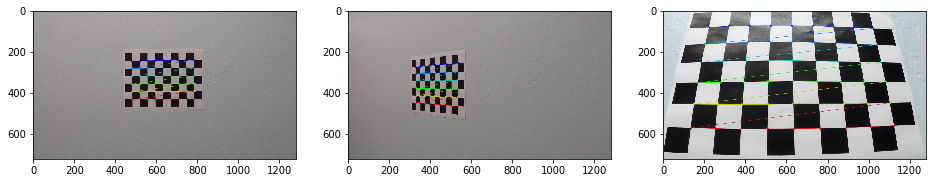

Training vehicle classifier...
Feature vector length: 1296
Using neural network
52.97 Seconds to train predictor...
Test Accuracy of predictor =  0.9884
(1,)


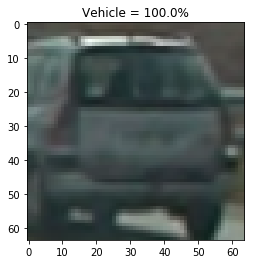

Veryfing vehicle. Should return one: 1.0
Veryfing non-vehicle. Should return zero: 0.0


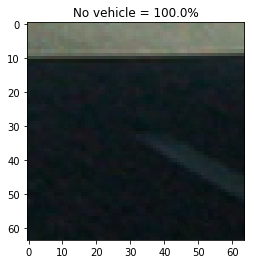

Done


In [2]:
%matplotlib inline

%run Object_Classifier.py
%run Train_Classifier.py

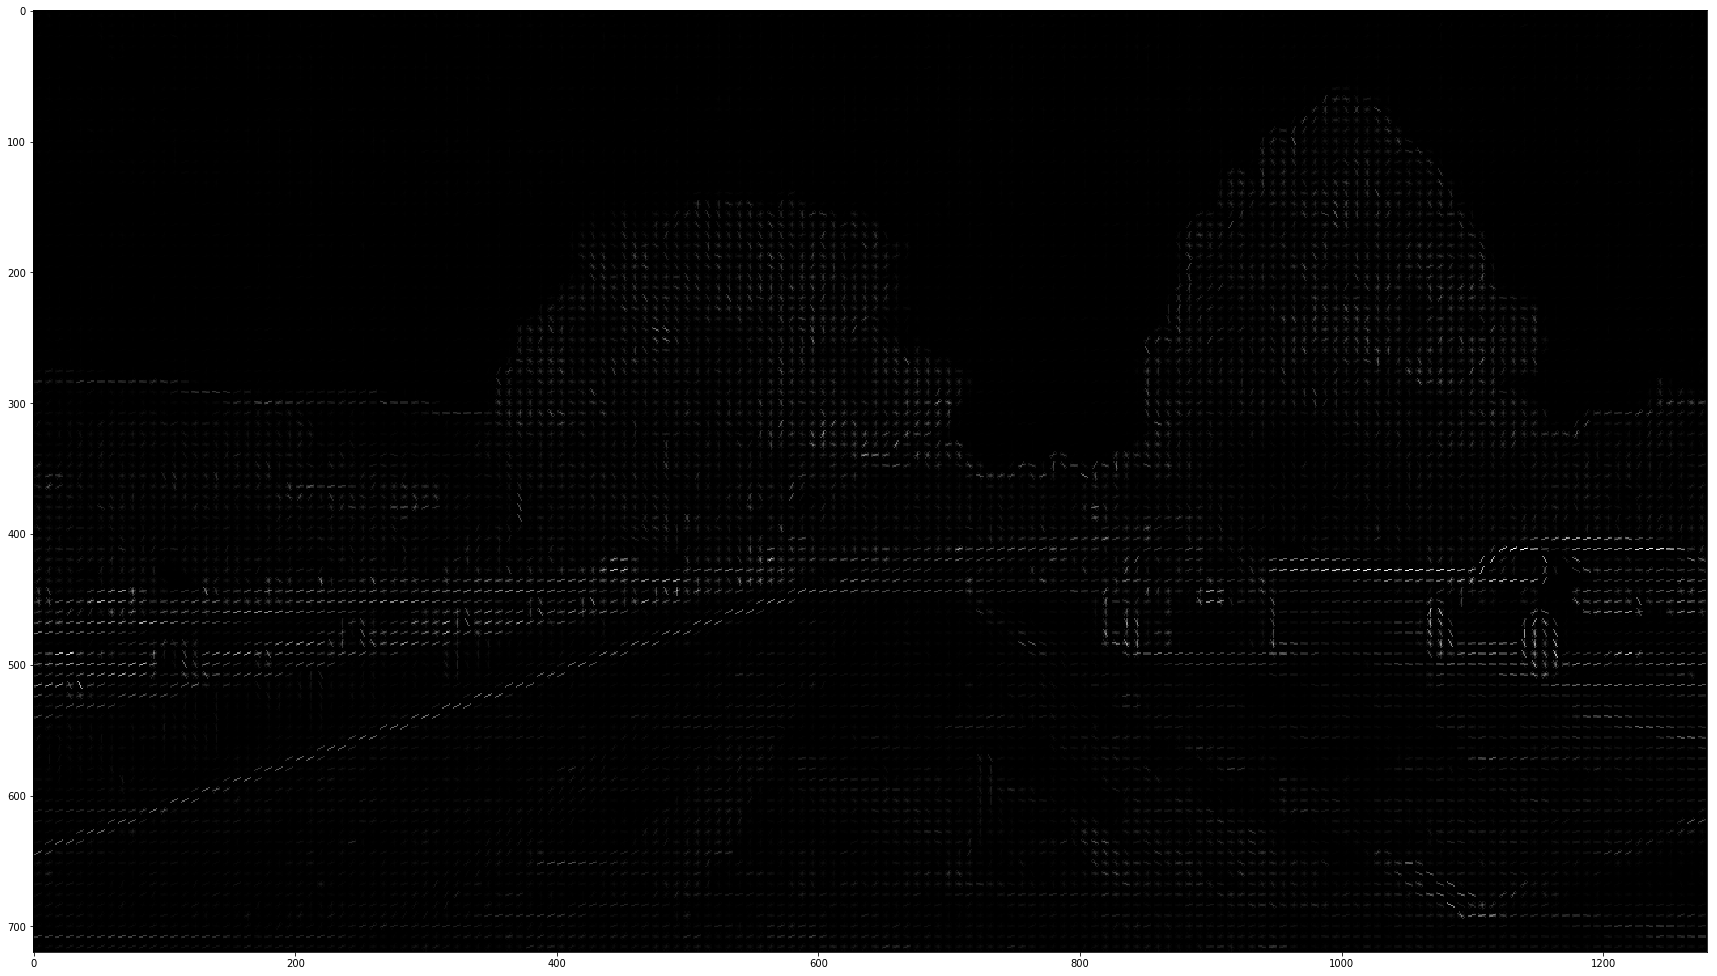

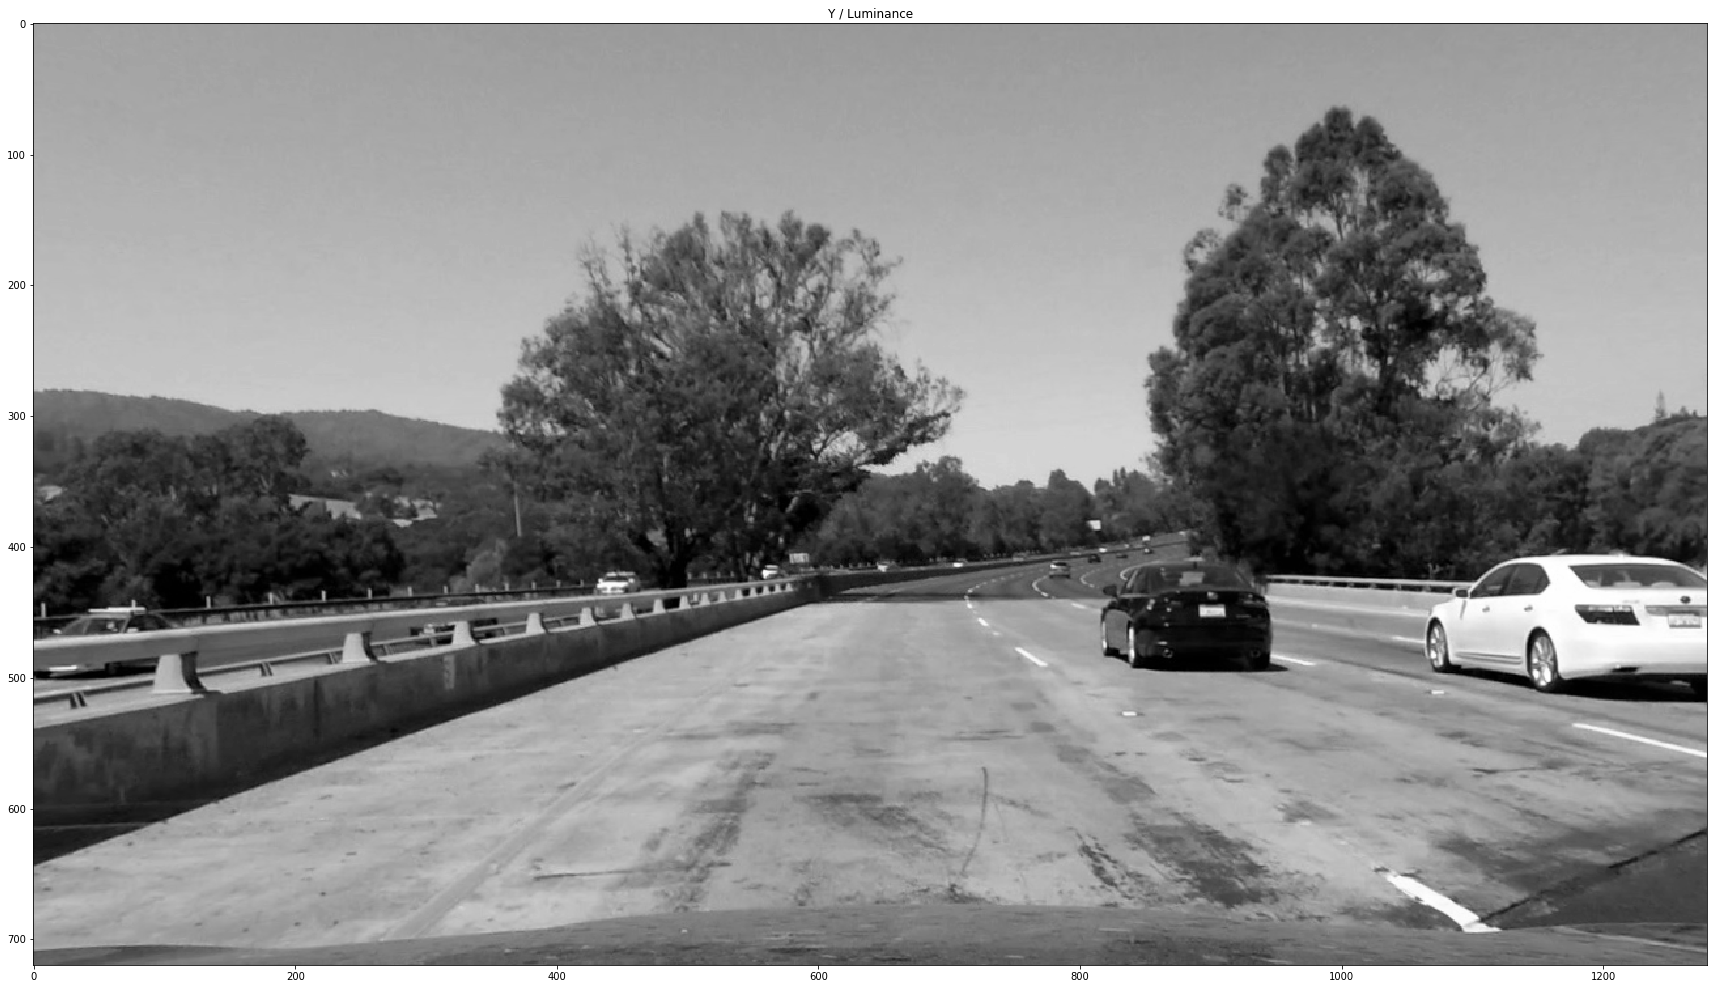

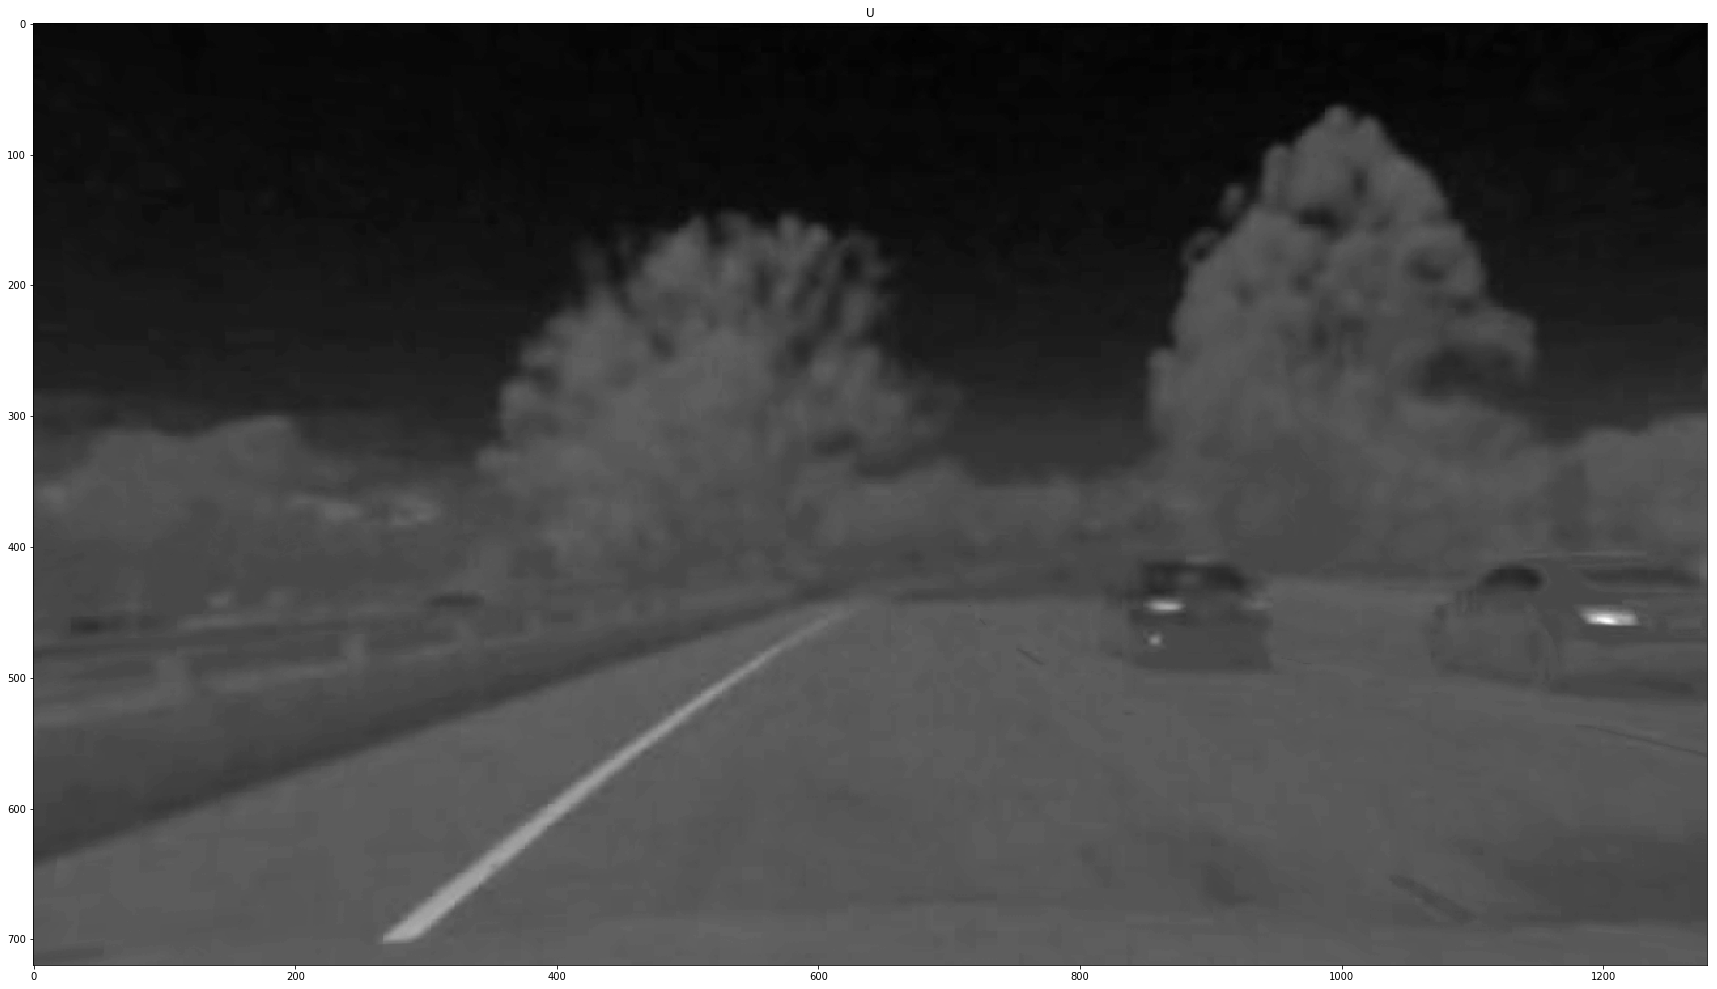

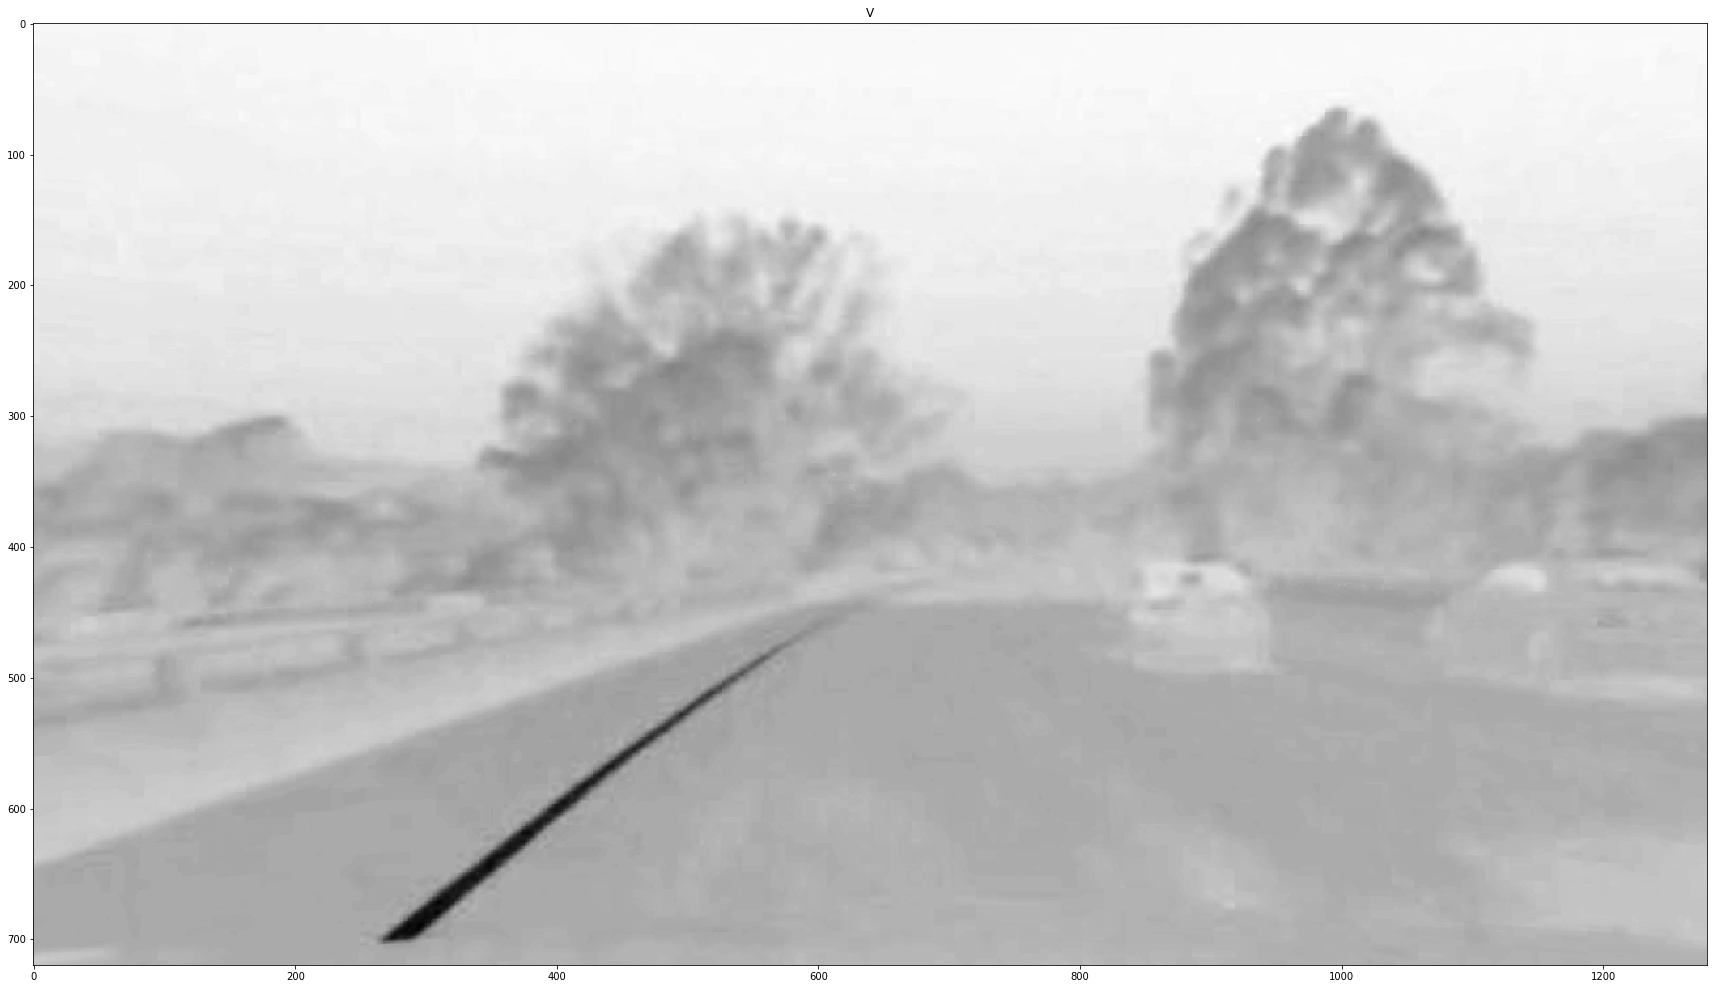

In [5]:
%run Hog_Me.py
%run ../1_16_Project_4_Advanced_Lane_Lines/AdvLaneCamera.py
%run ../1_16_Project_4_Advanced_Lane_Lines/AdvLaneHelper.py
lane_helper = AdvLaneHelper(camera)

hoggit = Hoggit(channel=0)

test_images = ["test_images/test1.jpg",
               "test_images/test2.jpg",
               "test_images/test3.jpg",
               "test_images/test4.jpg",
               "test_images/test5.jpg",
               "test_images/test6.jpg"]

image = lane_helper.load_and_undistort(test_images[0])

features, hog_img = hoggit.hog_image(image, visualize=True, feature_vector=True)

fig = plt.figure(figsize=(30,20))
plt.imshow(hog_img, cmap="gray")
plt.show()

hls = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

fig = plt.figure(figsize=(30,20))
plt.imshow(hls[:,:,0], cmap="gray")
plt.title("Y / Luminance")
plt.show()

fig = plt.figure(figsize=(30,20))
plt.imshow(hls[:,:,1], cmap="gray")
plt.title("U")
plt.show()

fig = plt.figure(figsize=(30,20))
plt.imshow(hls[:,:,2], cmap="gray")
plt.title("V")
plt.show()

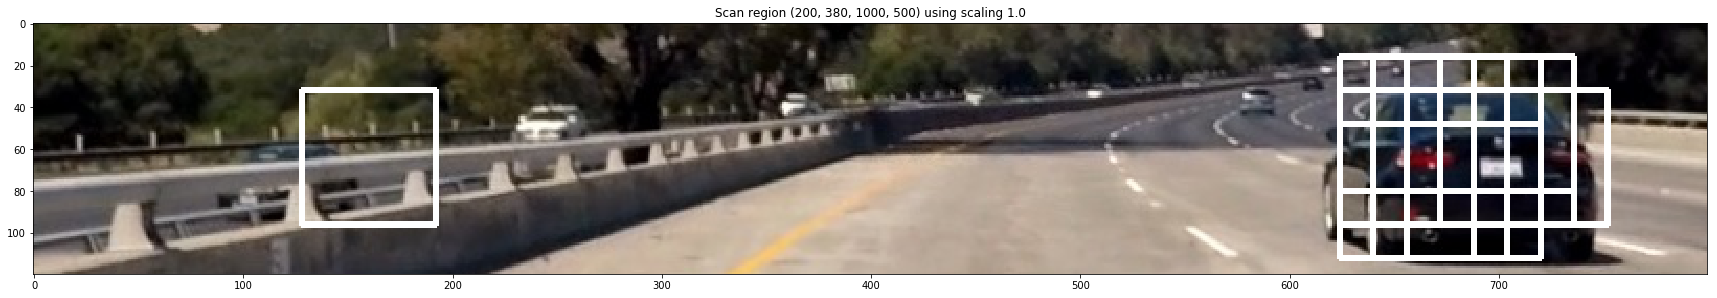

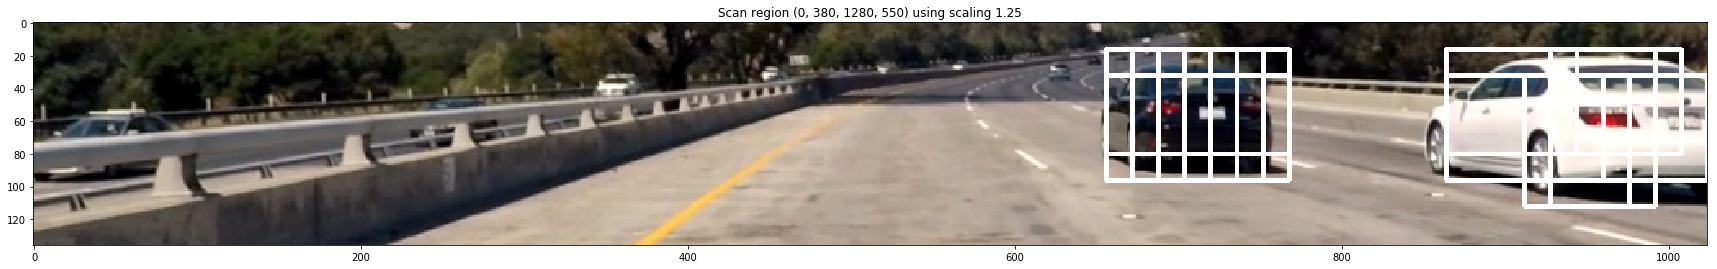

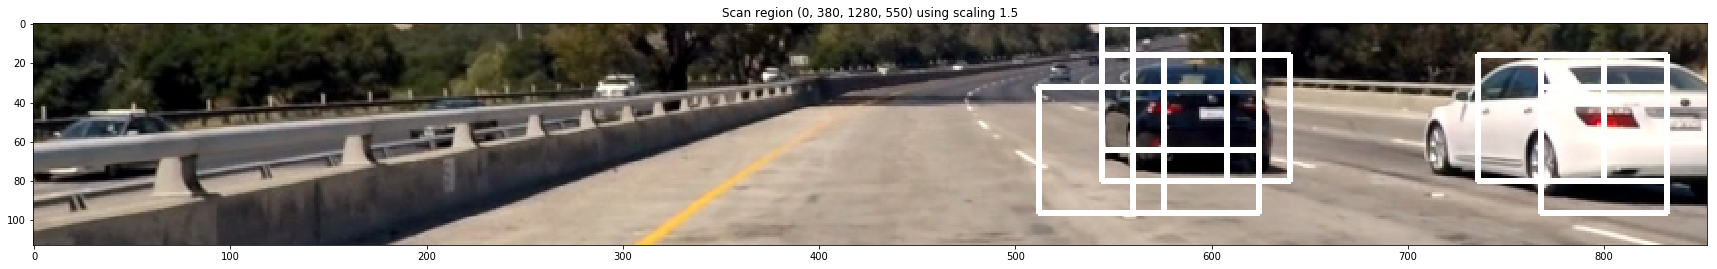

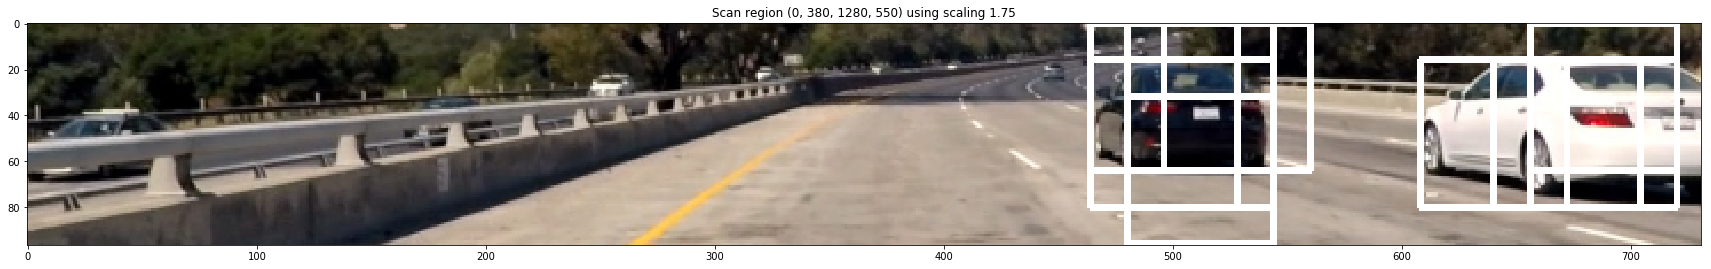

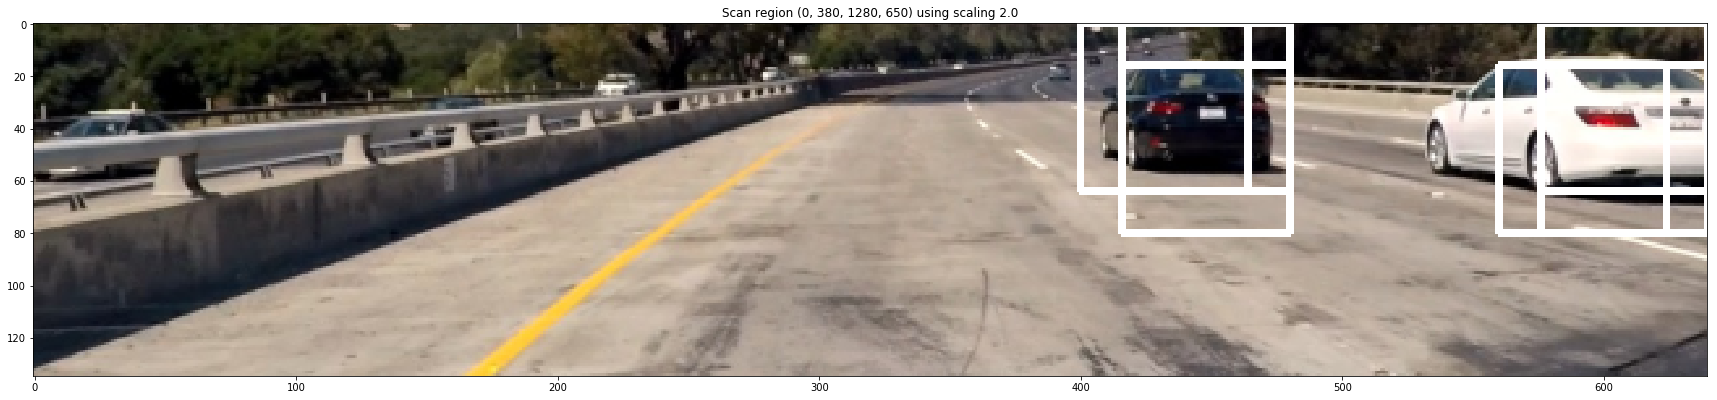

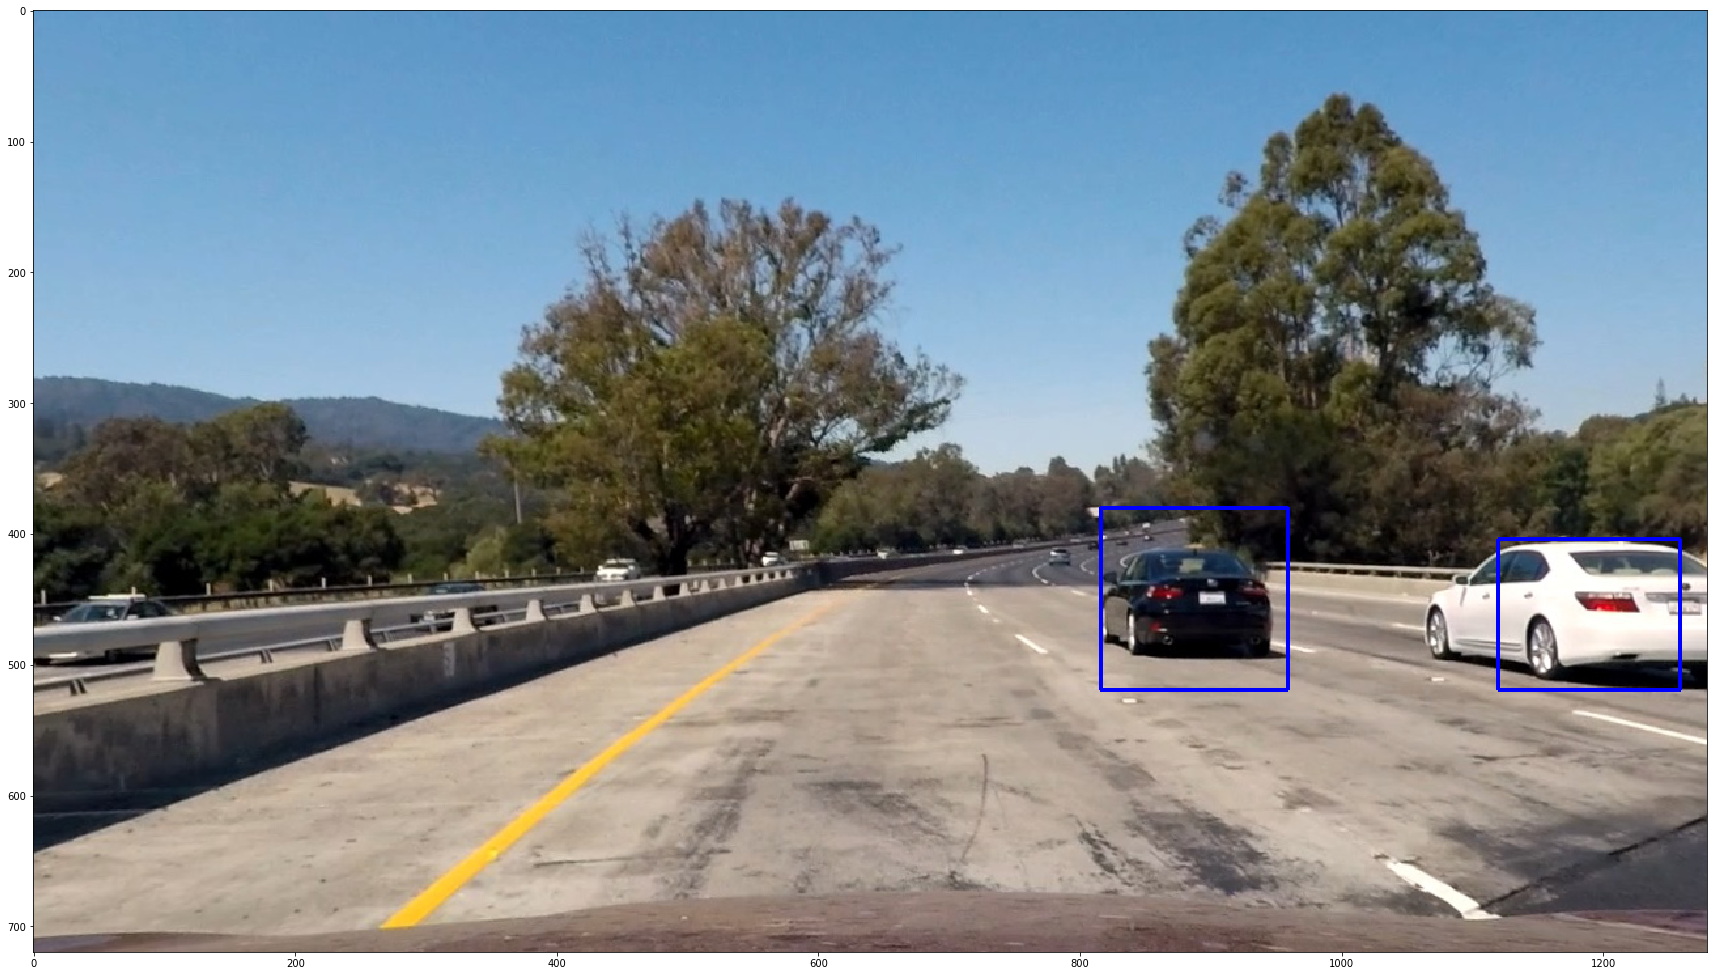

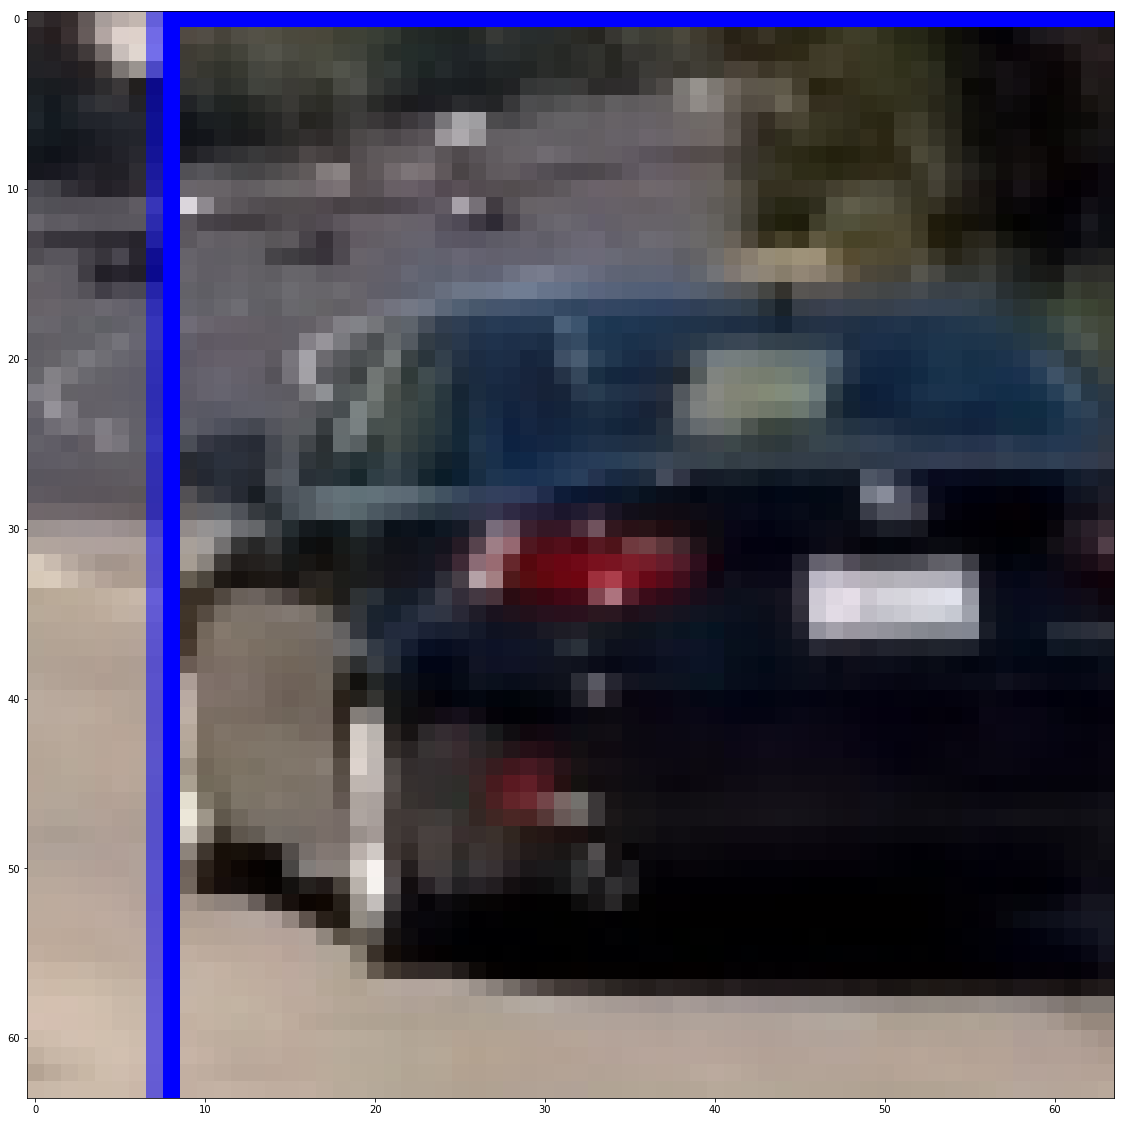

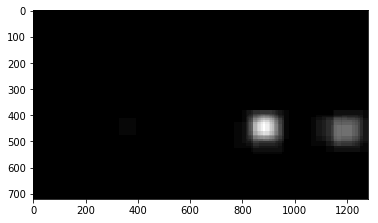

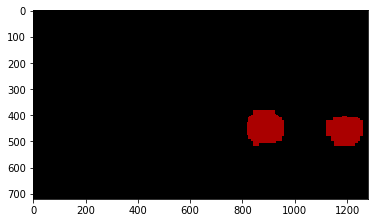

In [6]:
%run Vehicle_Trainer.py
%run Heater.py
%run Hog_Me.py
%run Object_Finder.py

trainer = Vehicle_Trainer()
trainer.load_from_disk()

image = lane_helper.load_and_undistort(test_images[0])

finder = Object_Finder(trainer.classifier, hogger=trainer.hoggit)

finder.find_objects_in_image(image, True)

heater = Heater()
heater.add_to_history(finder.boundings)
heat_map, color_heat = heater.get_heat(image)
boxes = heater.draw_labeled_bboxes(image)

fig = plt.figure(figsize=(30,20))
plt.imshow(boxes)
plt.show()

fig = plt.figure(figsize=(30,20))

finder.set_scaling(2.0)
plt.imshow(finder.get_resized_sub_sample(800,380))
plt.show()

plt.imshow(heater.last_unthreshed, cmap='gray')
plt.show()

plt.imshow(color_heat)
plt.show()
